# ¿Qué es la Regresión Lasso?

Lasso significa "Least Absolute Shrinkage and Selection Operator" (Operador de Reducción y Selección por Mínimos Absolutos). Es una técnica de regresión regularizada que extiende la regresión lineal ordinaria agregando una penalización específica.
En términos simples: Imagina que tienes muchas variables para predecir algo (como predecir el precio de una casa usando área, ubicación, número de habitaciones, etc.). Lasso no solo encuentra la mejor relación entre estas variables y el precio, sino que también puede "eliminar" automáticamente las variables menos importantes, simplificando tu modelo.

Imagina que tienes muchas variables para predecir algo (como predecir el precio de una casa usando área, ubicación, número de habitaciones, etc.). Lasso no solo encuentra la mejor relación entre estas variables y el precio, sino que también puede "eliminar" automáticamente las variables menos importantes, simplificando tu modelo.

**Definición Técnica**
La regresión Lasso minimiza la función:
Función objetivo = Error cuadrático medio + λ × Suma de valores absolutos de los coeficientes
Matemáticamente:

$min[½n × ||y - Xβ||² + λ × ||β||₁]$

Donde:

- $y$ son los valores reales
- $X$ son las variables predictoras
- $β$ son los coeficientes
- $λ (lambda)$ es el parámetro de penalización
- $||β||₁$ es la norma L1 (suma de valores absolutos)

**Ventajas de Lasso**

- Selección automática de variables: Puede reducir coeficientes a exactamente cero, eliminando variables irrelevantes
- Previene sobreajuste: La regularización mejora la generalización del modelo
- Interpretabilidad: Produce modelos más simples y fáciles de interpretar
- Manejo de multicolinealidad: Ayuda cuando las variables están correlacionadas
- Eficiente computacionalmente: Existen algoritmos rápidos para su implementación

**Desventajas de Lasso**

- Selección arbitraria en grupos correlacionados: Si varias variables están muy correlacionadas, Lasso puede elegir solo una aleatoriamente
- Limitación en variables vs observaciones: Si tienes más variables que observaciones, Lasso selecciona máximo n variables
- No agrupa variables relacionadas: A diferencia de Elastic Net, no maneja bien grupos de variables correlacionadas
- Sensible a la escala: Requiere estandarización de variables
- Puede ser muy agresivo: Puede eliminar variables importantes si λ es muy alto

## ¿Cuándo usar Regresión Lasso?
Usa Lasso cuando:

- Tienes muchas variables y sospechas que solo algunas son realmente importantes
- Quieres un modelo interpretable y simple
- Necesitas selección automática de características
- Hay indicios de sobreajuste en regresión lineal simple
- Los datos tienen alta dimensionalidad

## No uses Lasso cuando:

- Sabes que todas las variables son importantes
- Tienes grupos de variables altamente correlacionadas que deben mantenerse juntas
- El dataset es muy pequeño (menos de 50 observaciones típicamente)
- La relación no es lineal (considera otros métodos)

## Parámetro de Penalización ($λ$ - Lambda)

**¿Qué es λ?**

Lambda controla qué tan fuerte es la penalización. Es el parámetro más importante de Lasso.
Comportamiento de λ:

- $λ = 0$: Regresión lineal ordinaria (sin penalización)
- $λ$ pequeño: Poca penalización, modelo similar a regresión lineal
- $λ$ grande: Mucha penalización, muchos coeficientes se vuelven cero
- $λ$ muy grande: Todos los coeficientes se vuelven cero (modelo constante)

**¿Cómo elegir $λ$?**

- Validación cruzada: Método más común y confiable
- Criterios de información: AIC, BIC
- Curva de regularización: Visualizar cómo cambian los coeficientes
- Regla de 1 error estándar: Seleccionar el $λ$ más grande dentro de 1 SE del mínimo error

Calculando coeficientes para diferentes valores de λ...


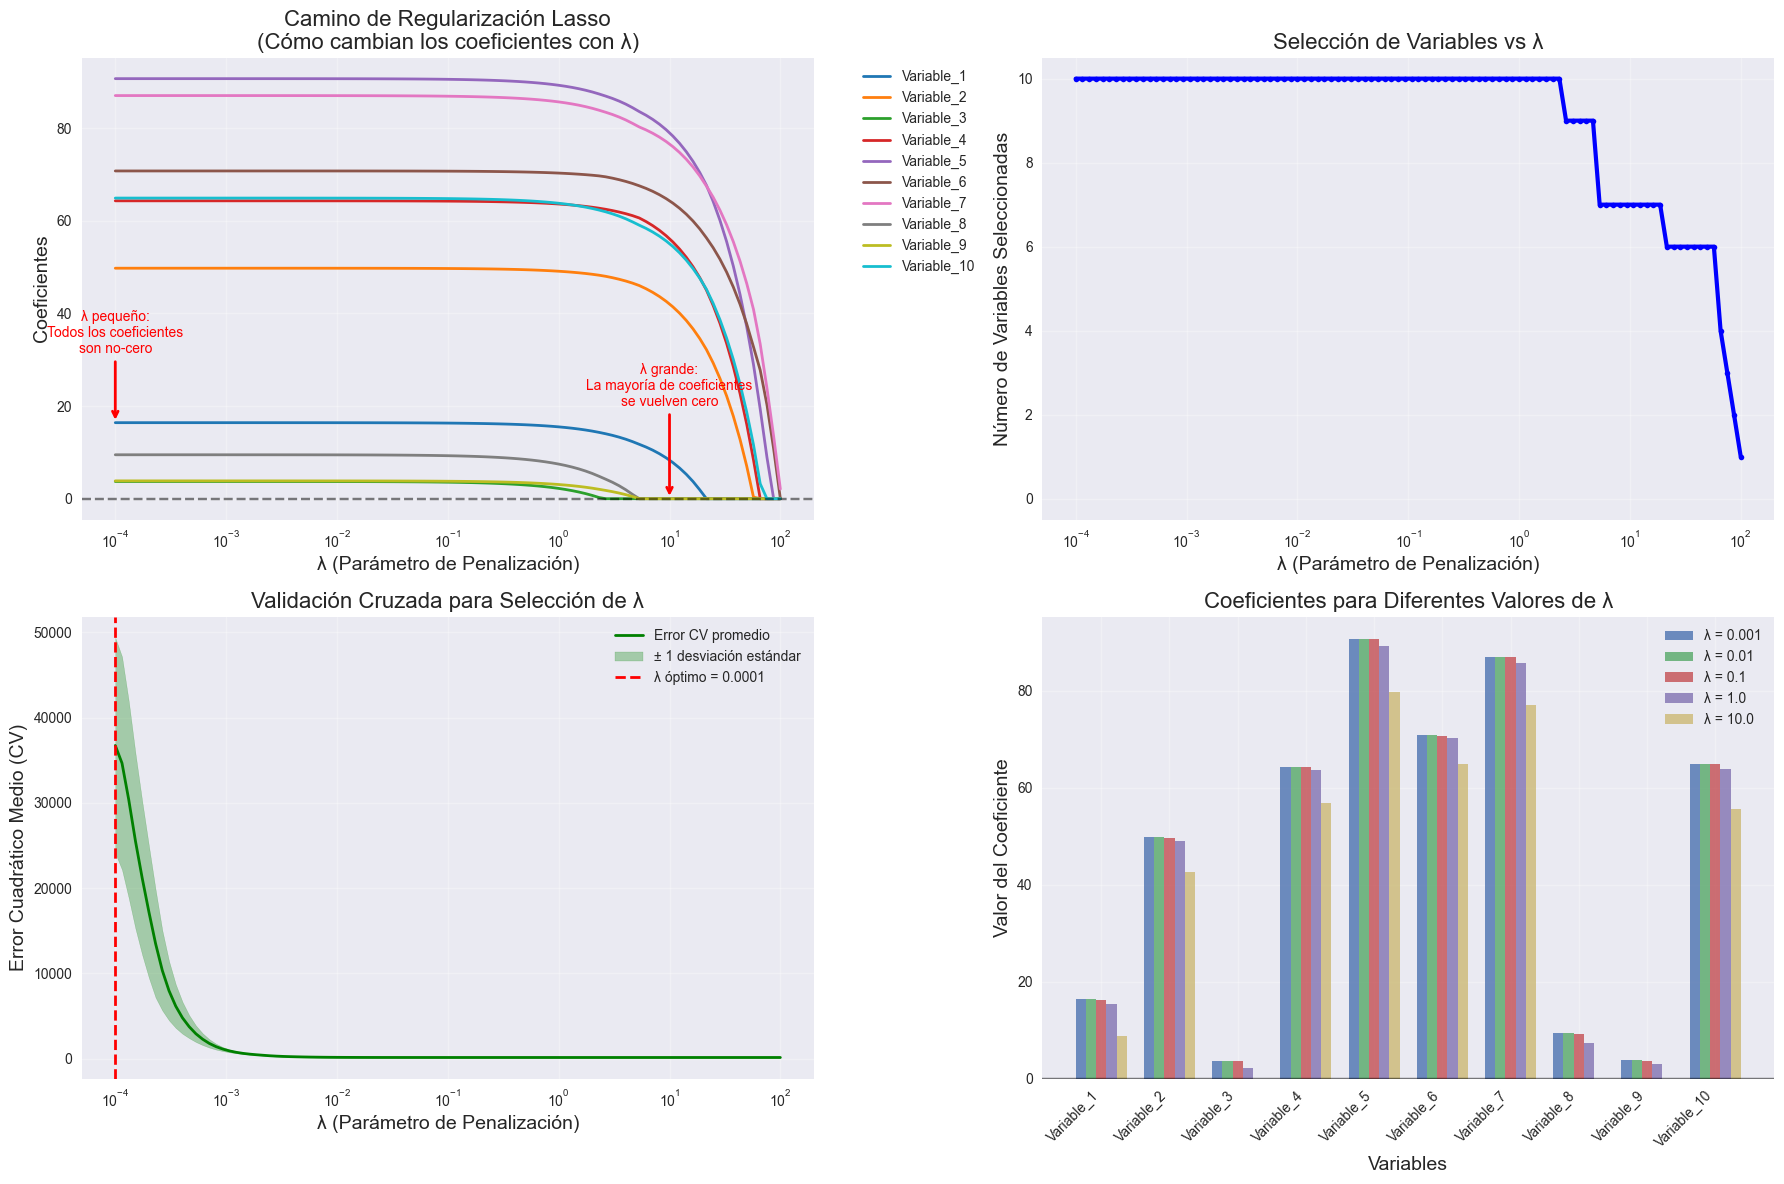


ANÁLISIS CUANTITATIVO DEL EFECTO DE λ

λ óptimo encontrado por validación cruzada: 0.0001
Error de validación cruzada mínimo: 120.61

Efecto de λ en la selección de variables:
λ = 0.001 → 10 variables seleccionadas
λ = 0.010 → 10 variables seleccionadas
λ = 0.100 → 10 variables seleccionadas
λ = 1.000 → 10 variables seleccionadas
λ = 10.000 →  7 variables seleccionadas

Coeficientes con λ óptimo:
Variable_1:  16.4139
Variable_2:  49.7584
Variable_3:   3.7149
Variable_4:  64.3051
Variable_5:  90.6792
Variable_6:  70.7529
Variable_7:  87.0259
Variable_8:   9.4837
Variable_9:   3.8470
Variable_10:  64.8991

INTERPRETACIÓN:
1. Con λ pequeño: Todos los coeficientes son no-cero (similar a regresión lineal)
2. Al aumentar λ: Los coeficientes se 'encogen' hacia cero
3. Con λ grande: La mayoría de coeficientes se vuelven exactamente cero
4. La validación cruzada nos ayuda a encontrar el λ óptimo
5. Lasso realiza selección automática de variables


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12

# Crear datos sintéticos
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear nombres para las características
feature_names = [f'Variable_{i+1}' for i in range(X.shape[1])]

# Definir un rango de valores lambda (alpha en sklearn)
alphas = np.logspace(-4, 2, 100)  # desde 0.0001 hasta 100

# Almacenar los coeficientes para cada alpha
coefficients = []

print("Calculando coeficientes para diferentes valores de λ...")
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_scaled, y)
    coefficients.append(lasso.coef_)

coefficients = np.array(coefficients)

# Crear el gráfico principal: Regularization Path
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Gráfico 1: Camino de Regularización (Regularization Path)
colors = plt.cm.tab10(np.linspace(0, 1, X.shape[1]))
for i in range(X.shape[1]):
    ax1.plot(alphas, coefficients[:, i], color=colors[i], 
             linewidth=2, label=feature_names[i])

ax1.set_xscale('log')
ax1.set_xlabel('λ (Parámetro de Penalización)', fontsize=14)
ax1.set_ylabel('Coeficientes', fontsize=14)
ax1.set_title('Camino de Regularización Lasso\n(Cómo cambian los coeficientes con λ)', fontsize=16)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Añadir anotaciones explicativas
ax1.annotate('λ pequeño:\nTodos los coeficientes\nson no-cero', 
             xy=(0.0001, coefficients[0, 0]), xytext=(0.0001, coefficients[0, 0] + 15),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=10, ha='center', color='red')

ax1.annotate('λ grande:\nLa mayoría de coeficientes\nse vuelven cero', 
             xy=(10, 0), xytext=(10, 20),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=10, ha='center', color='red')

# Gráfico 2: Número de variables seleccionadas vs λ
n_nonzero = np.sum(np.abs(coefficients) > 1e-5, axis=1)
ax2.plot(alphas, n_nonzero, 'b-', linewidth=3, marker='o', markersize=4)
ax2.set_xscale('log')
ax2.set_xlabel('λ (Parámetro de Penalización)', fontsize=14)
ax2.set_ylabel('Número de Variables Seleccionadas', fontsize=14)
ax2.set_title('Selección de Variables vs λ', fontsize=16)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-0.5, X.shape[1] + 0.5)

# Gráfico 3: Validación cruzada para encontrar el mejor λ
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_scaled, y)

# Calcular errores de validación cruzada
mse_path = lasso_cv.mse_path_.mean(axis=1)
std_path = lasso_cv.mse_path_.std(axis=1)

ax3.plot(alphas, mse_path, 'g-', linewidth=2, label='Error CV promedio')
ax3.fill_between(alphas, mse_path - std_path, mse_path + std_path, 
                alpha=0.3, color='green', label='± 1 desviación estándar')
ax3.axvline(lasso_cv.alpha_, color='red', linestyle='--', linewidth=2, 
           label=f'λ óptimo = {lasso_cv.alpha_:.4f}')
ax3.set_xscale('log')
ax3.set_xlabel('λ (Parámetro de Penalización)', fontsize=14)
ax3.set_ylabel('Error Cuadrático Medio (CV)', fontsize=14)
ax3.set_title('Validación Cruzada para Selección de λ', fontsize=16)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Gráfico 4: Comparación de coeficientes para diferentes λ
# Seleccionar algunos valores específicos de λ para comparar
lambda_examples = [0.001, 0.01, 0.1, 1.0, 10.0]
width = 0.15
x_pos = np.arange(len(feature_names))

for i, lambda_val in enumerate(lambda_examples):
    # Encontrar el índice más cercano a lambda_val
    idx = np.argmin(np.abs(alphas - lambda_val))
    ax4.bar(x_pos + i*width, coefficients[idx], width, 
           label=f'λ = {lambda_val}', alpha=0.8)

ax4.set_xlabel('Variables', fontsize=14)
ax4.set_ylabel('Valor del Coeficiente', fontsize=14)
ax4.set_title('Coeficientes para Diferentes Valores de λ', fontsize=16)
ax4.set_xticks(x_pos + width * 2)
ax4.set_xticklabels(feature_names, rotation=45, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()

# Mostrar información cuantitativa
print("\n" + "="*60)
print("ANÁLISIS CUANTITATIVO DEL EFECTO DE λ")
print("="*60)

print(f"\nλ óptimo encontrado por validación cruzada: {lasso_cv.alpha_:.4f}")
print(f"Error de validación cruzada mínimo: {min(mse_path):.2f}")

print("\nEfecto de λ en la selección de variables:")
for i, lambda_val in enumerate([0.001, 0.01, 0.1, 1.0, 10.0]):
    idx = np.argmin(np.abs(alphas - lambda_val))
    n_selected = np.sum(np.abs(coefficients[idx]) > 1e-5)
    print(f"λ = {lambda_val:5.3f} → {n_selected:2d} variables seleccionadas")

print("\nCoeficientes con λ óptimo:")
lasso_optimal = Lasso(alpha=lasso_cv.alpha_)
lasso_optimal.fit(X_scaled, y)
for i, coef in enumerate(lasso_optimal.coef_):
    if abs(coef) > 1e-5:
        print(f"{feature_names[i]}: {coef:8.4f}")
    else:
        print(f"{feature_names[i]}: {coef:8.4f} (eliminada)")

print("\n" + "="*60)
print("INTERPRETACIÓN:")
print("="*60)
print("1. Con λ pequeño: Todos los coeficientes son no-cero (similar a regresión lineal)")
print("2. Al aumentar λ: Los coeficientes se 'encogen' hacia cero")
print("3. Con λ grande: La mayoría de coeficientes se vuelven exactamente cero")
print("4. La validación cruzada nos ayuda a encontrar el λ óptimo")
print("5. Lasso realiza selección automática de variables")

# 👨‍💻📉 caso práctico

El mercado de aguacates en Estados Unidos representa una industria multimillonaria con patrones de consumo y precios altamente variables. Este dataset contiene información histórica de ventas de aguacates recopilada por la Junta de Aguacates Hass (Hass Avocado Board) entre 2015 y 2018, abarcando múltiples regiones metropolitanas de EE.UU.
El problema central que abordaremos es la predicción del precio promedio de aguacates utilizando información de volúmenes de venta, características del producto, ubicación geográfica y factores temporales. Esta es una aplicación práctica crucial para:

- Productores: Optimizar estrategias de precio y planificación de cosechas
- Distribuidores: Gestionar inventarios y márgenes de ganancia
- Retailers: Establecer precios competitivos y pronósticos de demanda
- Analistas de mercado: Identificar factores que impulsan las fluctuaciones de precios

La regresión Lasso es particularmente valiosa en este contexto porque nos permitirá identificar automáticamente cuáles de las múltiples variables disponibles son verdaderamente relevantes para determinar el precio, simplificando el modelo y haciéndolo más interpretable para la toma de decisiones comerciales.

## **📊 DESCRIPCIÓN DE VARIABLES**

Variable       | Tipo       | Descripción                                    | Unidad/Valores
---------------|------------|------------------------------------------------|--------------------------------
AveragePrice   | Numérica   | 🎯 Variable objetivo: Precio promedio         | Dólares USD ($)
Date           | Temporal   | Fecha de la observación semanal               | Formato YYYY-MM-DD
Total Volume   | Numérica   | Volumen total de aguacates vendidos           | Unidades individuales
4046           | Numérica   | Volumen aguacates pequeños (PLU 4046)         | Unidades individuales
4225           | Numérica   | Volumen aguacates grandes (PLU 4225)          | Unidades individuales
4770           | Numérica   | Volumen aguacates extra grandes (PLU 4770)    | Unidades individuales
Total Bags     | Numérica   | Número total de bolsas vendidas               | Unidades de bolsas
Small Bags     | Numérica   | Número de bolsas pequeñas vendidas            | Unidades de bolsas
Large Bags     | Numérica   | Número de bolsas grandes vendidas             | Unidades de bolsas
XLarge Bags    | Numérica   | Número de bolsas extra grandes vendidas       | Unidades de bolsas
type           | Categórica | Tipo de aguacate                              | "conventional" u "organic"
year           | Numérica   | Año de la observación                         | 2015, 2016, 2017, 2018
region         | Categórica | Región geográfica de venta                    | 54 regiones diferentes

## **🔍 Notas Importantes sobre las Variables:**
**Variables de Volumen:**

Los códigos PLU (Price Look-Up) son estándares de la industria para clasificar aguacates por tamaño
- PLU 4046: Aguacates pequeños (típicamente 173-285g)
- PLU 4225: Aguacates grandes (típicamente 285-454g)
- PLU 4770: Aguacates extra grandes (típicamente >454g)

**Variables de Bolsas:**

- Las bolsas representan empaques pre-portionados vendidos en supermercados
- Existe una relación jerárquica: Total Bags = Small Bags + Large Bags + XLarge Bags
- Importante para detectar multicolinealidad

**Variables Categóricas:**

- Tipo: Los aguacates orgánicos típicamente tienen precios premium
- Región: Incluye ciudades individuales y regiones agregadas como "TotalUS"

**Consideraciones para Modelado:**

- Posible multicolinealidad entre variables de volumen
- Estacionalidad en patrones de precio y consumo
- Heterogeneidad regional en preferencias y precios
- Tendencias temporales en adopción de aguacates orgánicos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 11
sns.set_palette("husl")

## PASO 1: CARGA Y EXPLORACIÓN INICIAL DE DATOS

In [3]:
df = pd.read_csv('avocado.csv').drop('Unnamed: 0',axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
print("📈 Información básica del dataset:")
print(f"• Filas: {df.shape[0]:,}")
print(f"• Columnas: {df.shape[1]}")
print(f"• Período: {df['Date'].min().strftime('%Y-%m-%d')} a {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"• Valores faltantes: {df.isnull().sum().sum()}")

📈 Información básica del dataset:
• Filas: 18,249
• Columnas: 13
• Período: 2015-01-04 a 2018-03-25
• Valores faltantes: 0


In [5]:
print("\n🎯 Estadísticas de la variable objetivo (AveragePrice):")
price_stats = df['AveragePrice'].describe()
for stat, value in price_stats.items():
    print(f"• {stat.capitalize()}: ${value:.2f}")
    
print(f"\n🥑 Distribución por tipo:")
type_counts = df['type'].value_counts()
for tipo, count in type_counts.items():
    percentage = (count / len(df)) * 100
    print(f"• {tipo.capitalize()}: {count:,} ({percentage:.1f}%)")

print(f"\n🗺️ Número de regiones únicas: {df['region'].nunique()}")


🎯 Estadísticas de la variable objetivo (AveragePrice):
• Count: $18249.00
• Mean: $1.41
• Std: $0.40
• Min: $0.44
• 25%: $1.10
• 50%: $1.37
• 75%: $1.66
• Max: $3.25

🥑 Distribución por tipo:
• Conventional: 9,126 (50.0%)
• Organic: 9,123 (50.0%)

🗺️ Número de regiones únicas: 54


## PASO 2: ANÁLISIS EXPLORATORIO DE DATOS (EDA)

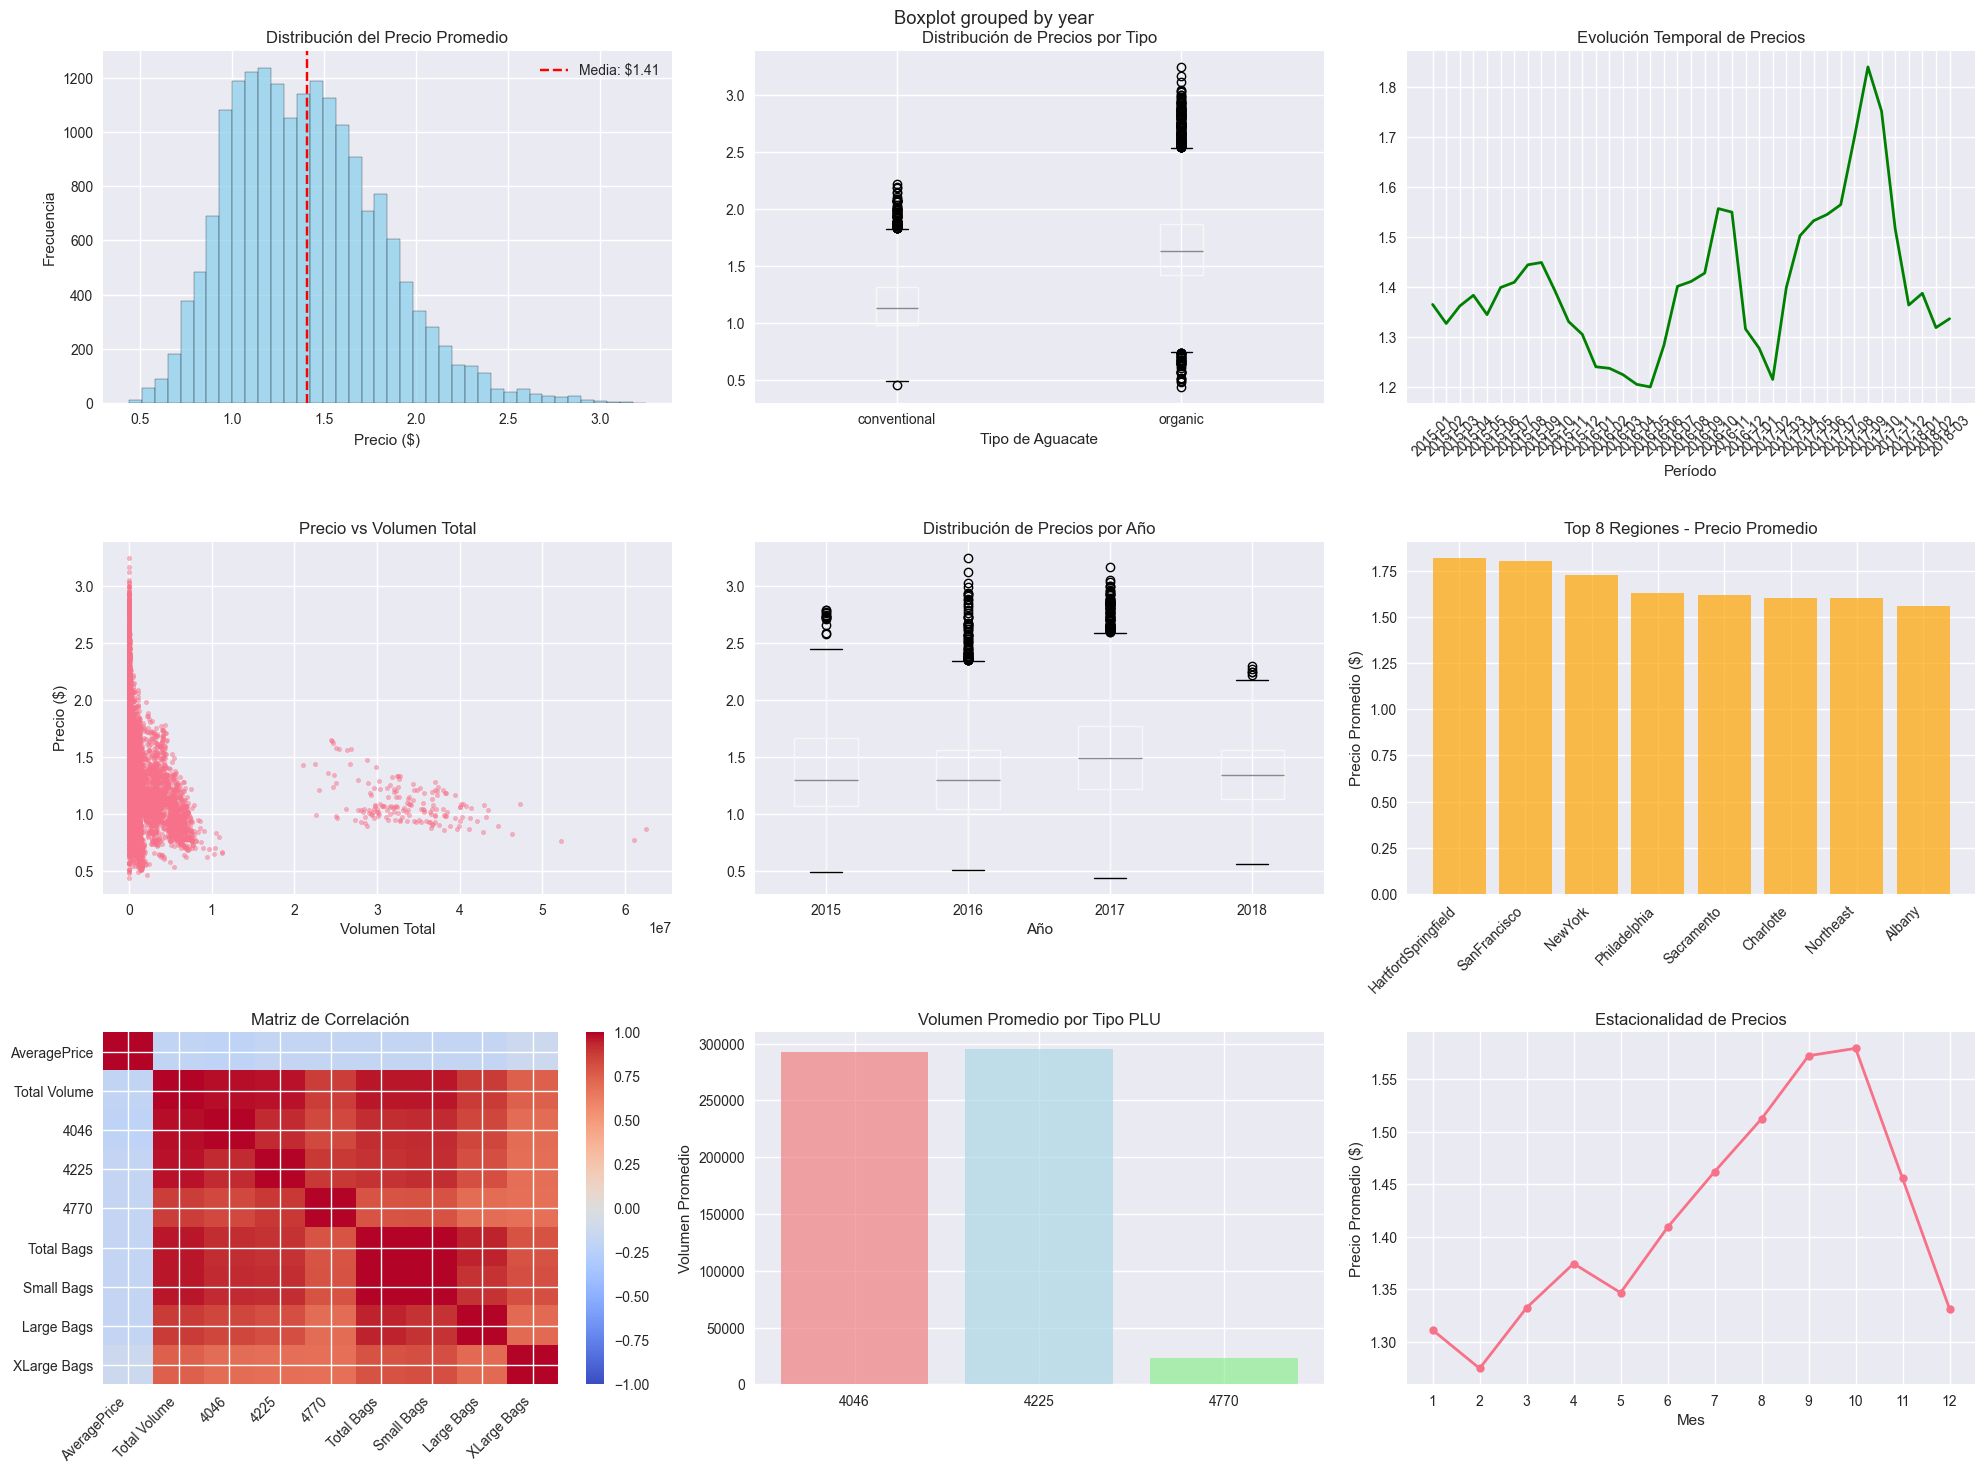

🔍 Análisis de correlaciones importantes:
• 4046: -0.208 (correlación débil negativa)
• Total Volume: -0.193 (correlación débil negativa)
• 4770: -0.179 (correlación débil negativa)
• Total Bags: -0.177 (correlación débil negativa)
• Small Bags: -0.175 (correlación débil negativa)
• Large Bags: -0.173 (correlación débil negativa)
• 4225: -0.173 (correlación débil negativa)
• XLarge Bags: -0.118 (correlación débil negativa)


In [6]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Análisis Exploratorio - Dataset Aguacates', fontsize=16, fontweight='bold')

# 1. Distribución del precio
axes[0,0].hist(df['AveragePrice'], bins=40, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribución del Precio Promedio')
axes[0,0].set_xlabel('Precio ($)')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].axvline(df['AveragePrice'].mean(), color='red', linestyle='--', 
                  label=f'Media: ${df["AveragePrice"].mean():.2f}')
axes[0,0].legend()

# 2. Precios por tipo
df.boxplot(column='AveragePrice', by='type', ax=axes[0,1])
axes[0,1].set_title('Distribución de Precios por Tipo')
axes[0,1].set_xlabel('Tipo de Aguacate')

# 3. Evolución temporal
monthly_prices = df.groupby(df['Date'].dt.to_period('M'))['AveragePrice'].mean()
axes[0,2].plot(monthly_prices.index.astype(str), monthly_prices.values, color='green', linewidth=2)
axes[0,2].set_title('Evolución Temporal de Precios')
axes[0,2].set_xlabel('Período')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Correlación precio vs volumen total
axes[1,0].scatter(df['Total Volume'], df['AveragePrice'], alpha=0.5, s=10)
axes[1,0].set_title('Precio vs Volumen Total')
axes[1,0].set_xlabel('Volumen Total')
axes[1,0].set_ylabel('Precio ($)')

# 5. Precios por año
df.boxplot(column='AveragePrice', by='year', ax=axes[1,1])
axes[1,1].set_title('Distribución de Precios por Año')
axes[1,1].set_xlabel('Año')

# 6. Top regiones por precio promedio
top_regions = df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False).head(8)
axes[1,2].bar(range(len(top_regions)), top_regions.values, color='orange', alpha=0.7)
axes[1,2].set_title('Top 8 Regiones - Precio Promedio')
axes[1,2].set_xticks(range(len(top_regions)))
axes[1,2].set_xticklabels(top_regions.index, rotation=45, ha='right')
axes[1,2].set_ylabel('Precio Promedio ($)')

# 7. Matriz de correlación de variables numéricas
numeric_cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
corr_matrix = df[numeric_cols].corr()
im = axes[2,0].imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[2,0].set_xticks(range(len(numeric_cols)))
axes[2,0].set_yticks(range(len(numeric_cols)))
axes[2,0].set_xticklabels(numeric_cols, rotation=45, ha='right')
axes[2,0].set_yticklabels(numeric_cols)
axes[2,0].set_title('Matriz de Correlación')
plt.colorbar(im, ax=axes[2,0])

# 8. Distribución de volúmenes por tipo PLU
plu_cols = ['4046', '4225', '4770']
plu_means = [df[col].mean() for col in plu_cols]
axes[2,1].bar(plu_cols, plu_means, color=['lightcoral', 'lightblue', 'lightgreen'], alpha=0.7)
axes[2,1].set_title('Volumen Promedio por Tipo PLU')
axes[2,1].set_ylabel('Volumen Promedio')

# 9. Seasonalidad mensual
df['month'] = df['Date'].dt.month
monthly_trend = df.groupby('month')['AveragePrice'].mean()
axes[2,2].plot(monthly_trend.index, monthly_trend.values, marker='o', linewidth=2, markersize=6)
axes[2,2].set_title('Estacionalidad de Precios')
axes[2,2].set_xlabel('Mes')
axes[2,2].set_ylabel('Precio Promedio ($)')
axes[2,2].set_xticks(range(1, 13))

plt.tight_layout()
plt.show()

# Análisis de correlaciones
print("🔍 Análisis de correlaciones importantes:")
price_corrs = df[numeric_cols].corr()['AveragePrice'].sort_values(key=abs, ascending=False)[1:]
for var, corr in price_corrs.items():
    strength = "fuerte" if abs(corr) > 0.5 else "moderada" if abs(corr) > 0.3 else "débil"
    direction = "positiva" if corr > 0 else "negativa"
    print(f"• {var}: {corr:.3f} (correlación {strength} {direction})")

## PASO 3: INGENIERÍA DE CARACTERÍSTICAS

In [32]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'month'],
      dtype='object')

In [7]:
# Crear copia para transformaciones
df_model = df.copy()

# 3.1 Características temporales
print("3.1 Creando características temporales...")
df_model['month'] = df_model['Date'].dt.month
df_model['quarter'] = df_model['Date'].dt.quarter
df_model['week_of_year'] = df_model['Date'].dt.isocalendar().week
df_model['is_holiday_season'] = df_model['month'].isin([11, 12]).astype(int)

# 3.2 Características de proporciones
print("3.2 Creando características de proporciones...")
df_model['pct_4046'] = df_model['4046'] / (df_model['Total Volume'] + 1e-8)
df_model['pct_4225'] = df_model['4225'] / (df_model['Total Volume'] + 1e-8)
df_model['pct_4770'] = df_model['4770'] / (df_model['Total Volume'] + 1e-8)
df_model['pct_bags'] = df_model['Total Bags'] / (df_model['Total Volume'] + 1e-8)

# 3.3 Características de interacción
print("3.3 Creando características de interacción...")
df_model['volume_per_bag'] = df_model['Total Volume'] / (df_model['Total Bags'] + 1e-8)
df_model['large_to_small_bags'] = df_model['Large Bags'] / (df_model['Small Bags'] + 1e-8)

# 3.4 Transformaciones logarítmicas para variables con sesgo
print("3.4 Aplicando transformaciones logarítmicas...")
volume_cols = ['Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags']

for col in volume_cols:
    df_model[f'log_{col}'] = np.log1p(df_model[col])

# 3.5 Codificación de variables categóricas
print("3.5 Codificando variables categóricas...")
le_type = LabelEncoder()
le_region = LabelEncoder()

df_model['type_encoded'] = le_type.fit_transform(df_model['type'])
df_model['region_encoded'] = le_region.fit_transform(df_model['region'])

# One-hot encoding para regiones principales (las más frecuentes)
top_regions = df_model['region'].value_counts().head(10).index
for region in top_regions:
    df_model[f'region_{region}'] = (df_model['region'] == region).astype(int)

print(f"✅ Características creadas. Total de columnas: {df_model.shape[1]}")


3.1 Creando características temporales...
3.2 Creando características de proporciones...
3.3 Creando características de interacción...
3.4 Aplicando transformaciones logarítmicas...
3.5 Codificando variables categóricas...
✅ Características creadas. Total de columnas: 42


## PASO 4: SELECCIÓN DE VARIABLES Y PREPARACIÓN

In [8]:
# Definir características para el modelo
feature_columns = [
    # Variables originales de volumen (transformadas)
    'log_Total_Volume', 'log_4046', 'log_4225', 'log_4770', 
    'log_Total_Bags', 'log_Small_Bags', 'log_Large_Bags',
    
    # Características de proporción
    'pct_4046', 'pct_4225', 'pct_4770', 'pct_bags',
    
    # Características de interacción
    'volume_per_bag', 'large_to_small_bags',
    
    # Variables categóricas
    'type_encoded', 'region_encoded',
    
    # Variables temporales
    'year', 'month', 'quarter', 'week_of_year', 'is_holiday_season'
]

# Agregar regiones principales como dummies
region_dummies = [col for col in df_model.columns if col.startswith('region_')]
feature_columns.extend(region_dummies)

print(f"🔍 Variables seleccionadas para el modelo: {len(feature_columns)}")
for i, col in enumerate(feature_columns, 1):
    print(f"{i:2d}. {col}")


🔍 Variables seleccionadas para el modelo: 31
 1. log_Total_Volume
 2. log_4046
 3. log_4225
 4. log_4770
 5. log_Total_Bags
 6. log_Small_Bags
 7. log_Large_Bags
 8. pct_4046
 9. pct_4225
10. pct_4770
11. pct_bags
12. volume_per_bag
13. large_to_small_bags
14. type_encoded
15. region_encoded
16. year
17. month
18. quarter
19. week_of_year
20. is_holiday_season
21. region_encoded
22. region_Albany
23. region_Atlanta
24. region_BaltimoreWashington
25. region_Boise
26. region_Boston
27. region_BuffaloRochester
28. region_California
29. region_Charlotte
30. region_Chicago
31. region_CincinnatiDayton


In [9]:
feature_columns = ['log_Total Volume',
 'log_4046',
 'log_4225',
 'log_4770',
 'log_Total Bags',
 'log_Small Bags',
 'log_Large Bags',
 'pct_4046',
 'pct_4225',
 'pct_4770',
 'pct_bags',
 'volume_per_bag',
 'large_to_small_bags',
 'type_encoded',
 'region_encoded',
 'year',
 'month',
 'quarter',
 'week_of_year',
 'is_holiday_season',
 'region_encoded',
 'region_Albany',
 'region_Atlanta',
 'region_BaltimoreWashington',
 'region_Boise',
 'region_Boston',
 'region_BuffaloRochester',
 'region_California',
 'region_Charlotte',
 'region_Chicago',
 'region_CincinnatiDayton']

In [11]:
# Preparar datos para modelado
X = df_model[feature_columns].fillna(0)  # Rellenar NaN si existen
y = df_model['AveragePrice']

print(f"\n📐 Dimensiones finales:")
print(f"• X (características): {X.shape}")
print(f"• y (objetivo): {y.shape}")

# Verificar multicolinealidad
correlation_matrix = X.corr()
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print(f"\n⚠️ Variables con alta correlación (>0.8):")
    for var1, var2, corr in high_corr_pairs[:5]:  # Mostrar solo las primeras 5
        print(f"• {var1} ↔ {var2}: {corr:.3f}")
    if len(high_corr_pairs) > 5:
        print(f"... y {len(high_corr_pairs) - 5} pares más")
else:
    print("\n✅ No se detectaron correlaciones extremas entre variables")



📐 Dimensiones finales:
• X (características): (18249, 31)
• y (objetivo): (18249,)

⚠️ Variables con alta correlación (>0.8):
• log_Total Volume ↔ log_4046: 0.887
• log_Total Volume ↔ log_4225: 0.909
• log_Total Volume ↔ log_4770: 0.834
• log_Total Volume ↔ log_Total Bags: 0.935
• log_Total Volume ↔ log_Small Bags: 0.877
... y 5 pares más


## PASO 5: DIVISIÓN DE DATOS Y ESTANDARIZACIÓN

In [12]:
# División estratificada por tipo y año
stratify_col = df_model['type'] + '_' + df_model['year'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=stratify_col
)

print(f"División de datos:")
print(f"• Entrenamiento: {X_train.shape[0]:,} observaciones ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"• Prueba: {X_test.shape[0]:,} observaciones ({X_test.shape[0]/len(X)*100:.1f}%)")

# Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Datos estandarizados:")
print(f"• Media de características en entrenamiento: {X_train_scaled.mean():.6f}")
print(f"• Desviación estándar en entrenamiento: {X_train_scaled.std():.6f}")

División de datos:
• Entrenamiento: 14,599 observaciones (80.0%)
• Prueba: 3,650 observaciones (20.0%)

✅ Datos estandarizados:
• Media de características en entrenamiento: 0.000000
• Desviación estándar en entrenamiento: 1.000000


## PASO 6: IMPLEMENTACIÓN DE REGRESIÓN LASSO

In [16]:
# 6.1 Búsqueda del lambda óptimo con validación cruzada
print("6.1 Búsqueda del λ óptimo con validación cruzada de 5 pliegues...")

# Definir rango de alphas (lambdas)
alphas = np.logspace(-4, 2, 100)  # De 0.0001 a 100

# Validación cruzada
lasso_cv = LassoCV(
    alphas=alphas, 
    cv=5, 
    random_state=42, 
    max_iter=5000,
    n_jobs=-1
)

lasso_cv.fit(X_train_scaled, y_train)

print(f"• λ óptimo encontrado: {lasso_cv.alpha_:.6f}")
print(f"• Score R² en validación cruzada: {lasso_cv.score(X_train_scaled, y_train):.4f}")
print(f"• Error MSE mínimo en CV: {lasso_cv.mse_path_.mean(axis=1).min():.6f}")

# 6.2 Entrenar modelo final con lambda óptimo
print("\n6.2 Entrenando modelo Lasso final...")
lasso_final = Lasso(alpha=lasso_cv.alpha_, max_iter=5000, random_state=42)
lasso_final.fit(X_train_scaled, y_train)

# 6.3 Modelo de comparación: Regresión Lineal
print("6.3 Entrenando modelo de regresión lineal para comparación...")
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

print("✅ Modelos entrenados exitosamente")

6.1 Búsqueda del λ óptimo con validación cruzada de 5 pliegues...
• λ óptimo encontrado: 0.000100
• Score R² en validación cruzada: 0.6098
• Error MSE mínimo en CV: 0.063297

6.2 Entrenando modelo Lasso final...
6.3 Entrenando modelo de regresión lineal para comparación...
✅ Modelos entrenados exitosamente


## PASO 7: EVALUACIÓN DE MODELOS

In [17]:
# Predicciones
y_train_pred_lasso = lasso_final.predict(X_train_scaled)
y_test_pred_lasso = lasso_final.predict(X_test_scaled)

y_train_pred_linear = linear_model.predict(X_train_scaled)
y_test_pred_linear = linear_model.predict(X_test_scaled)

# Función para calcular métricas
def calculate_comprehensive_metrics(y_true, y_pred, dataset_name, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"\n{model_name} - {dataset_name}:")
    print(f"• RMSE: ${rmse:.4f}")
    print(f"• MAE:  ${mae:.4f}")
    print(f"• R²:   {r2:.4f}")
    print(f"• MAPE: {mape:.2f}%")
    
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MAPE': mape}

# Calcular métricas para ambos conjuntos
print("🏋️ MÉTRICAS DE ENTRENAMIENTO:")
train_lasso = calculate_comprehensive_metrics(y_train, y_train_pred_lasso, "Entrenamiento", "Lasso")
train_linear = calculate_comprehensive_metrics(y_train, y_train_pred_linear, "Entrenamiento", "Lineal")

print("\n🎯 MÉTRICAS DE PRUEBA:")
test_lasso = calculate_comprehensive_metrics(y_test, y_test_pred_lasso, "Prueba", "Lasso")
test_linear = calculate_comprehensive_metrics(y_test, y_test_pred_linear, "Prueba", "Lineal")

# Análisis de overfitting
print("\n🔍 ANÁLISIS DE OVERFITTING:")
lasso_overfit = train_lasso['R2'] - test_lasso['R2']
linear_overfit = train_linear['R2'] - test_linear['R2']

print(f"• Lasso - Diferencia R² (train-test): {lasso_overfit:.4f}")
print(f"• Lineal - Diferencia R² (train-test): {linear_overfit:.4f}")

if lasso_overfit < linear_overfit:
    print("✅ Lasso muestra menor overfitting")
else:
    print("⚠️ Regresión lineal muestra menor overfitting")

🏋️ MÉTRICAS DE ENTRENAMIENTO:

Lasso - Entrenamiento:
• RMSE: $0.2510
• MAE:  $0.1956
• R²:   0.6098
• MAPE: 14.79%

Lineal - Entrenamiento:
• RMSE: $0.2510
• MAE:  $0.1956
• R²:   0.6099
• MAPE: 14.79%

🎯 MÉTRICAS DE PRUEBA:

Lasso - Prueba:
• RMSE: $0.2595
• MAE:  $0.2007
• R²:   0.5915
• MAPE: 15.05%

Lineal - Prueba:
• RMSE: $0.2595
• MAE:  $0.2007
• R²:   0.5914
• MAPE: 15.05%

🔍 ANÁLISIS DE OVERFITTING:
• Lasso - Diferencia R² (train-test): 0.0183
• Lineal - Diferencia R² (train-test): 0.0185
✅ Lasso muestra menor overfitting


## PASO 8: ANÁLISIS DE COEFICIENTES Y SELECCIÓN DE VARIABLES

In [24]:
# Comparación de coeficientes
coef_comparison = pd.DataFrame({
    'Variable': feature_columns,
    'Lasso_Coef': lasso_final.coef_,
    'Linear_Coef': linear_model.coef_,
    'Lasso_Abs': np.abs(lasso_final.coef_)
})

# Ordenar por importancia en Lasso
coef_comparison = coef_comparison.sort_values('Lasso_Abs', ascending=False)

# Variables seleccionadas vs eliminadas
threshold = 1e-6
selected_vars = coef_comparison[coef_comparison['Lasso_Abs'] > threshold]
eliminated_vars = coef_comparison[coef_comparison['Lasso_Abs'] <= threshold]

print(f"📌 RESUMEN DE SELECCIÓN DE VARIABLES:")
print(f"• Variables seleccionadas por Lasso: {len(selected_vars)} de {len(feature_columns)}")
print(f"• Variables eliminadas por Lasso: {len(eliminated_vars)}")
print(f"• Porcentaje de reducción: {(len(eliminated_vars)/len(feature_columns))*100:.1f}%")

print(f"\n🏆 TOP 10 VARIABLES MÁS IMPORTANTES (según Lasso):")
for i, (_, row) in enumerate(selected_vars.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['Variable']:<20} → Coef: {row['Lasso_Coef']:8.4f}")

if len(eliminated_vars) > 0:
    print(f"\n❌ VARIABLES ELIMINADAS por Lasso:")
    for i, var in enumerate(eliminated_vars['Variable'].head(10), 1):
        print(f"{i:2d}. {var}")
    if len(eliminated_vars) > 10:
        print(f"    ... y {len(eliminated_vars) - 10} variables más")

📌 RESUMEN DE SELECCIÓN DE VARIABLES:
• Variables seleccionadas por Lasso: 30 de 31
• Variables eliminadas por Lasso: 1
• Porcentaje de reducción: 3.2%

🏆 TOP 10 VARIABLES MÁS IMPORTANTES (según Lasso):
 1. log_Total Volume     → Coef:  -0.2758
 2. type_encoded         → Coef:   0.2020
 3. log_Small Bags       → Coef:   0.1637
 4. year                 → Coef:   0.1142
 5. log_Total Bags       → Coef:  -0.0966
 6. month                → Coef:   0.0813
 7. is_holiday_season    → Coef:  -0.0771
 8. log_4225             → Coef:   0.0697
 9. pct_bags             → Coef:  -0.0682
10. pct_4225             → Coef:   0.0651

❌ VARIABLES ELIMINADAS por Lasso:
 1. pct_4046


In [25]:
coef_comparison.head(50)

,Variable,Lasso_Coef,Linear_Coef,Lasso_Abs
0,log_Total Volume,-0.275780,-0.281314,0.275780
13,type_encoded,0.201967,0.202341,0.201967
5,log_Small Bags,0.163738,0.166662,0.163738
15,year,0.114233,0.114422,0.114233
4,log_Total Bags,-0.096559,-0.098970,0.096559
16,month,0.081257,0.082623,0.081257
19,is_holiday_season,-0.077146,-0.077385,0.077146
2,log_4225,0.069712,0.072954,0.069712
10,pct_bags,-0.068166,0.960628,0.068166
8,pct_4225,0.065057,1.059450,0.065057


## PASO 9: VISUALIZACIONES DE RESULTADOS

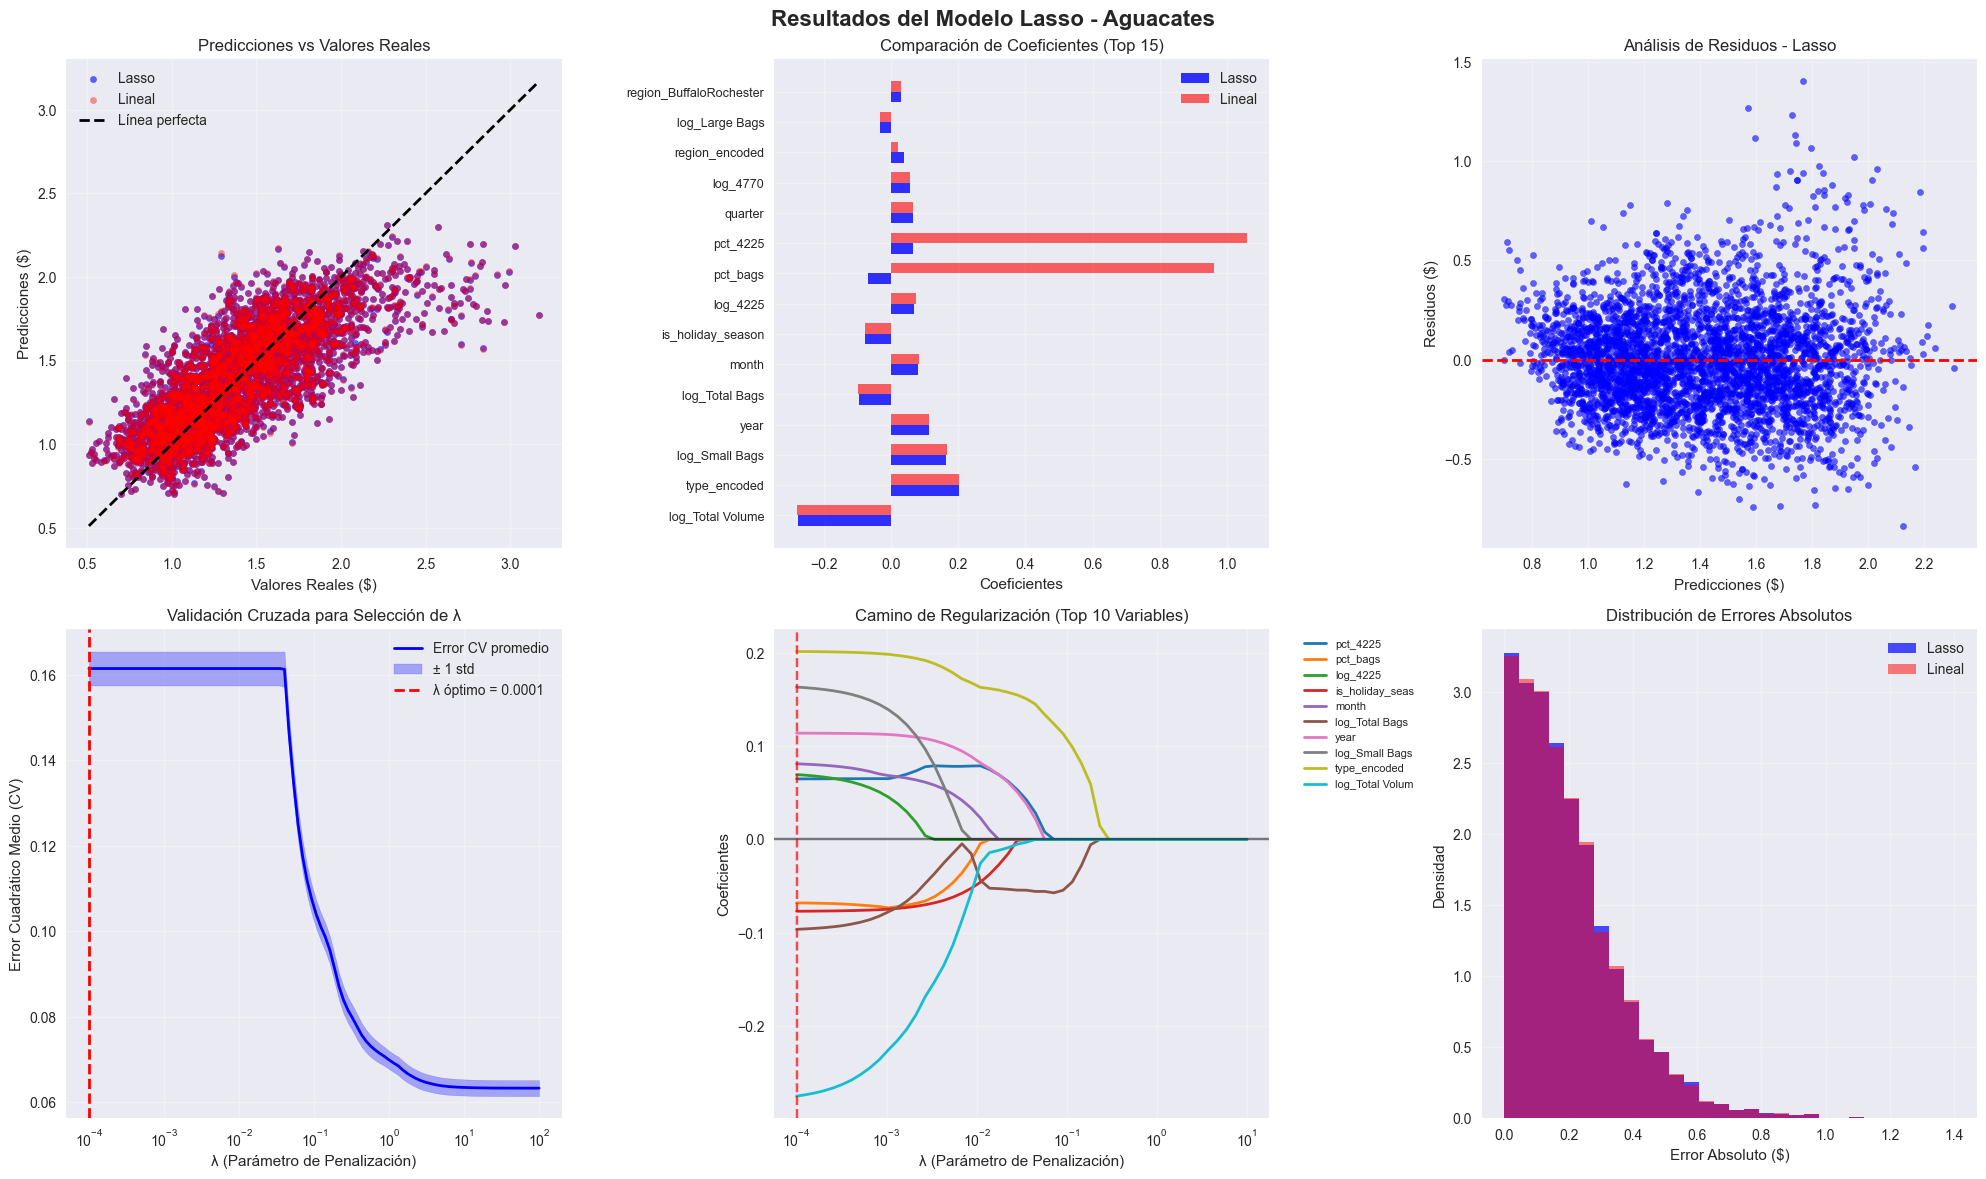

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Resultados del Modelo Lasso - Aguacates', fontsize=16, fontweight='bold')

# 1. Predicciones vs Valores Reales
axes[0,0].scatter(y_test, y_test_pred_lasso, alpha=0.6, s=20, color='blue', label='Lasso')
axes[0,0].scatter(y_test, y_test_pred_linear, alpha=0.4, s=20, color='red', label='Lineal')
min_val, max_val = y_test.min(), y_test.max()
axes[0,0].plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Línea perfecta')
axes[0,0].set_xlabel('Valores Reales ($)')
axes[0,0].set_ylabel('Predicciones ($)')
axes[0,0].set_title('Predicciones vs Valores Reales')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Comparación de coeficientes (top 15)
top_15_vars = selected_vars.head(15)
x_pos = np.arange(len(top_15_vars))
width = 0.35

axes[0,1].barh(x_pos - width/2, top_15_vars['Lasso_Coef'], width, 
               label='Lasso', alpha=0.8, color='blue')
axes[0,1].barh(x_pos + width/2, top_15_vars['Linear_Coef'], width, 
               label='Lineal', alpha=0.6, color='red')
axes[0,1].set_yticks(x_pos)
axes[0,1].set_yticklabels(top_15_vars['Variable'], fontsize=9)
axes[0,1].set_xlabel('Coeficientes')
axes[0,1].set_title('Comparación de Coeficientes (Top 15)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Residuos del modelo Lasso
residuals_lasso = y_test - y_test_pred_lasso
axes[0,2].scatter(y_test_pred_lasso, residuals_lasso, alpha=0.6, s=20, color='blue')
axes[0,2].axhline(y=0, color='red', linestyle='--', lw=2)
axes[0,2].set_xlabel('Predicciones ($)')
axes[0,2].set_ylabel('Residuos ($)')
axes[0,2].set_title('Análisis de Residuos - Lasso')
axes[0,2].grid(True, alpha=0.3)

# 4. Curva de validación cruzada
mse_mean = lasso_cv.mse_path_.mean(axis=1)
mse_std = lasso_cv.mse_path_.std(axis=1)

axes[1,0].plot(alphas, mse_mean, 'b-', linewidth=2, label='Error CV promedio')
axes[1,0].fill_between(alphas, mse_mean - mse_std, mse_mean + mse_std, 
                       alpha=0.3, color='blue', label='± 1 std')
axes[1,0].axvline(lasso_cv.alpha_, color='red', linestyle='--', linewidth=2,
                  label=f'λ óptimo = {lasso_cv.alpha_:.4f}')
axes[1,0].set_xscale('log')
axes[1,0].set_xlabel('λ (Parámetro de Penalización)')
axes[1,0].set_ylabel('Error Cuadrático Medio (CV)')
axes[1,0].set_title('Validación Cruzada para Selección de λ')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 5. Camino de regularización (Regularization Path)
# Calcular coeficientes para diferentes alphas
alphas_path = np.logspace(-4, 1, 50)
coefs_path = []

for alpha in alphas_path:
    lasso_temp = Lasso(alpha=alpha, max_iter=5000)
    lasso_temp.fit(X_train_scaled, y_train)
    coefs_path.append(lasso_temp.coef_)

coefs_path = np.array(coefs_path)

# Mostrar solo las variables más importantes
important_vars_idx = np.argsort(np.abs(lasso_final.coef_))[-10:]  # Top 10
colors = plt.cm.tab10(np.linspace(0, 1, len(important_vars_idx)))

for i, var_idx in enumerate(important_vars_idx):
    axes[1,1].plot(alphas_path, coefs_path[:, var_idx], 
                   color=colors[i], linewidth=2, 
                   label=feature_columns[var_idx][:15])  # Truncar nombres largos

axes[1,1].set_xscale('log')
axes[1,1].set_xlabel('λ (Parámetro de Penalización)')
axes[1,1].set_ylabel('Coeficientes')
axes[1,1].set_title('Camino de Regularización (Top 10 Variables)')
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[1,1].grid(True, alpha=0.3)
axes[1,1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[1,1].axvline(lasso_cv.alpha_, color='red', linestyle='--', alpha=0.7)

# 6. Distribución de errores
error_lasso = np.abs(y_test - y_test_pred_lasso)
error_linear = np.abs(y_test - y_test_pred_linear)

axes[1,2].hist(error_lasso, bins=30, alpha=0.7, label='Lasso', color='blue', density=True)
axes[1,2].hist(error_linear, bins=30, alpha=0.5, label='Lineal', color='red', density=True)
axes[1,2].set_xlabel('Error Absoluto ($)')
axes[1,2].set_ylabel('Densidad')
axes[1,2].set_title('Distribución de Errores Absolutos')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **Nota:**
- Dividir los datos en train, test y oot(son periodos que no se consideran en train ni test- **Referencia código  modelo redge**)
- Ajustar el modelo lasso y compara los resultados
- Identificar el $\alpha$  optimo
 